In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path=r'C:\Users\user\Downloads\diabetes.csv'

In [5]:
health_dataset=pd.read_csv(path)

In [11]:
health_dataset.isna().any().sum()

0

In [18]:
health_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: xlabel='Age', ylabel='count'>

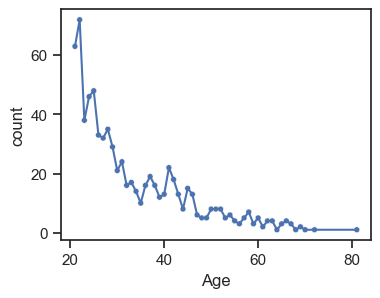

In [72]:
sns.set(rc = {'figure.figsize':(4,3)},style='white', palette=None)
sns.set_theme(style="ticks")
birth_with_age =health_dataset.groupby('Age').agg(count=('Pregnancies', 'count')).reset_index()
sns.scatterplot(birth_with_age, x=birth_with_age['Age'], y=birth_with_age['count'], size=0.01, legend=None)
sns.lineplot(birth_with_age, x=birth_with_age['Age'], y=birth_with_age['count'])



C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


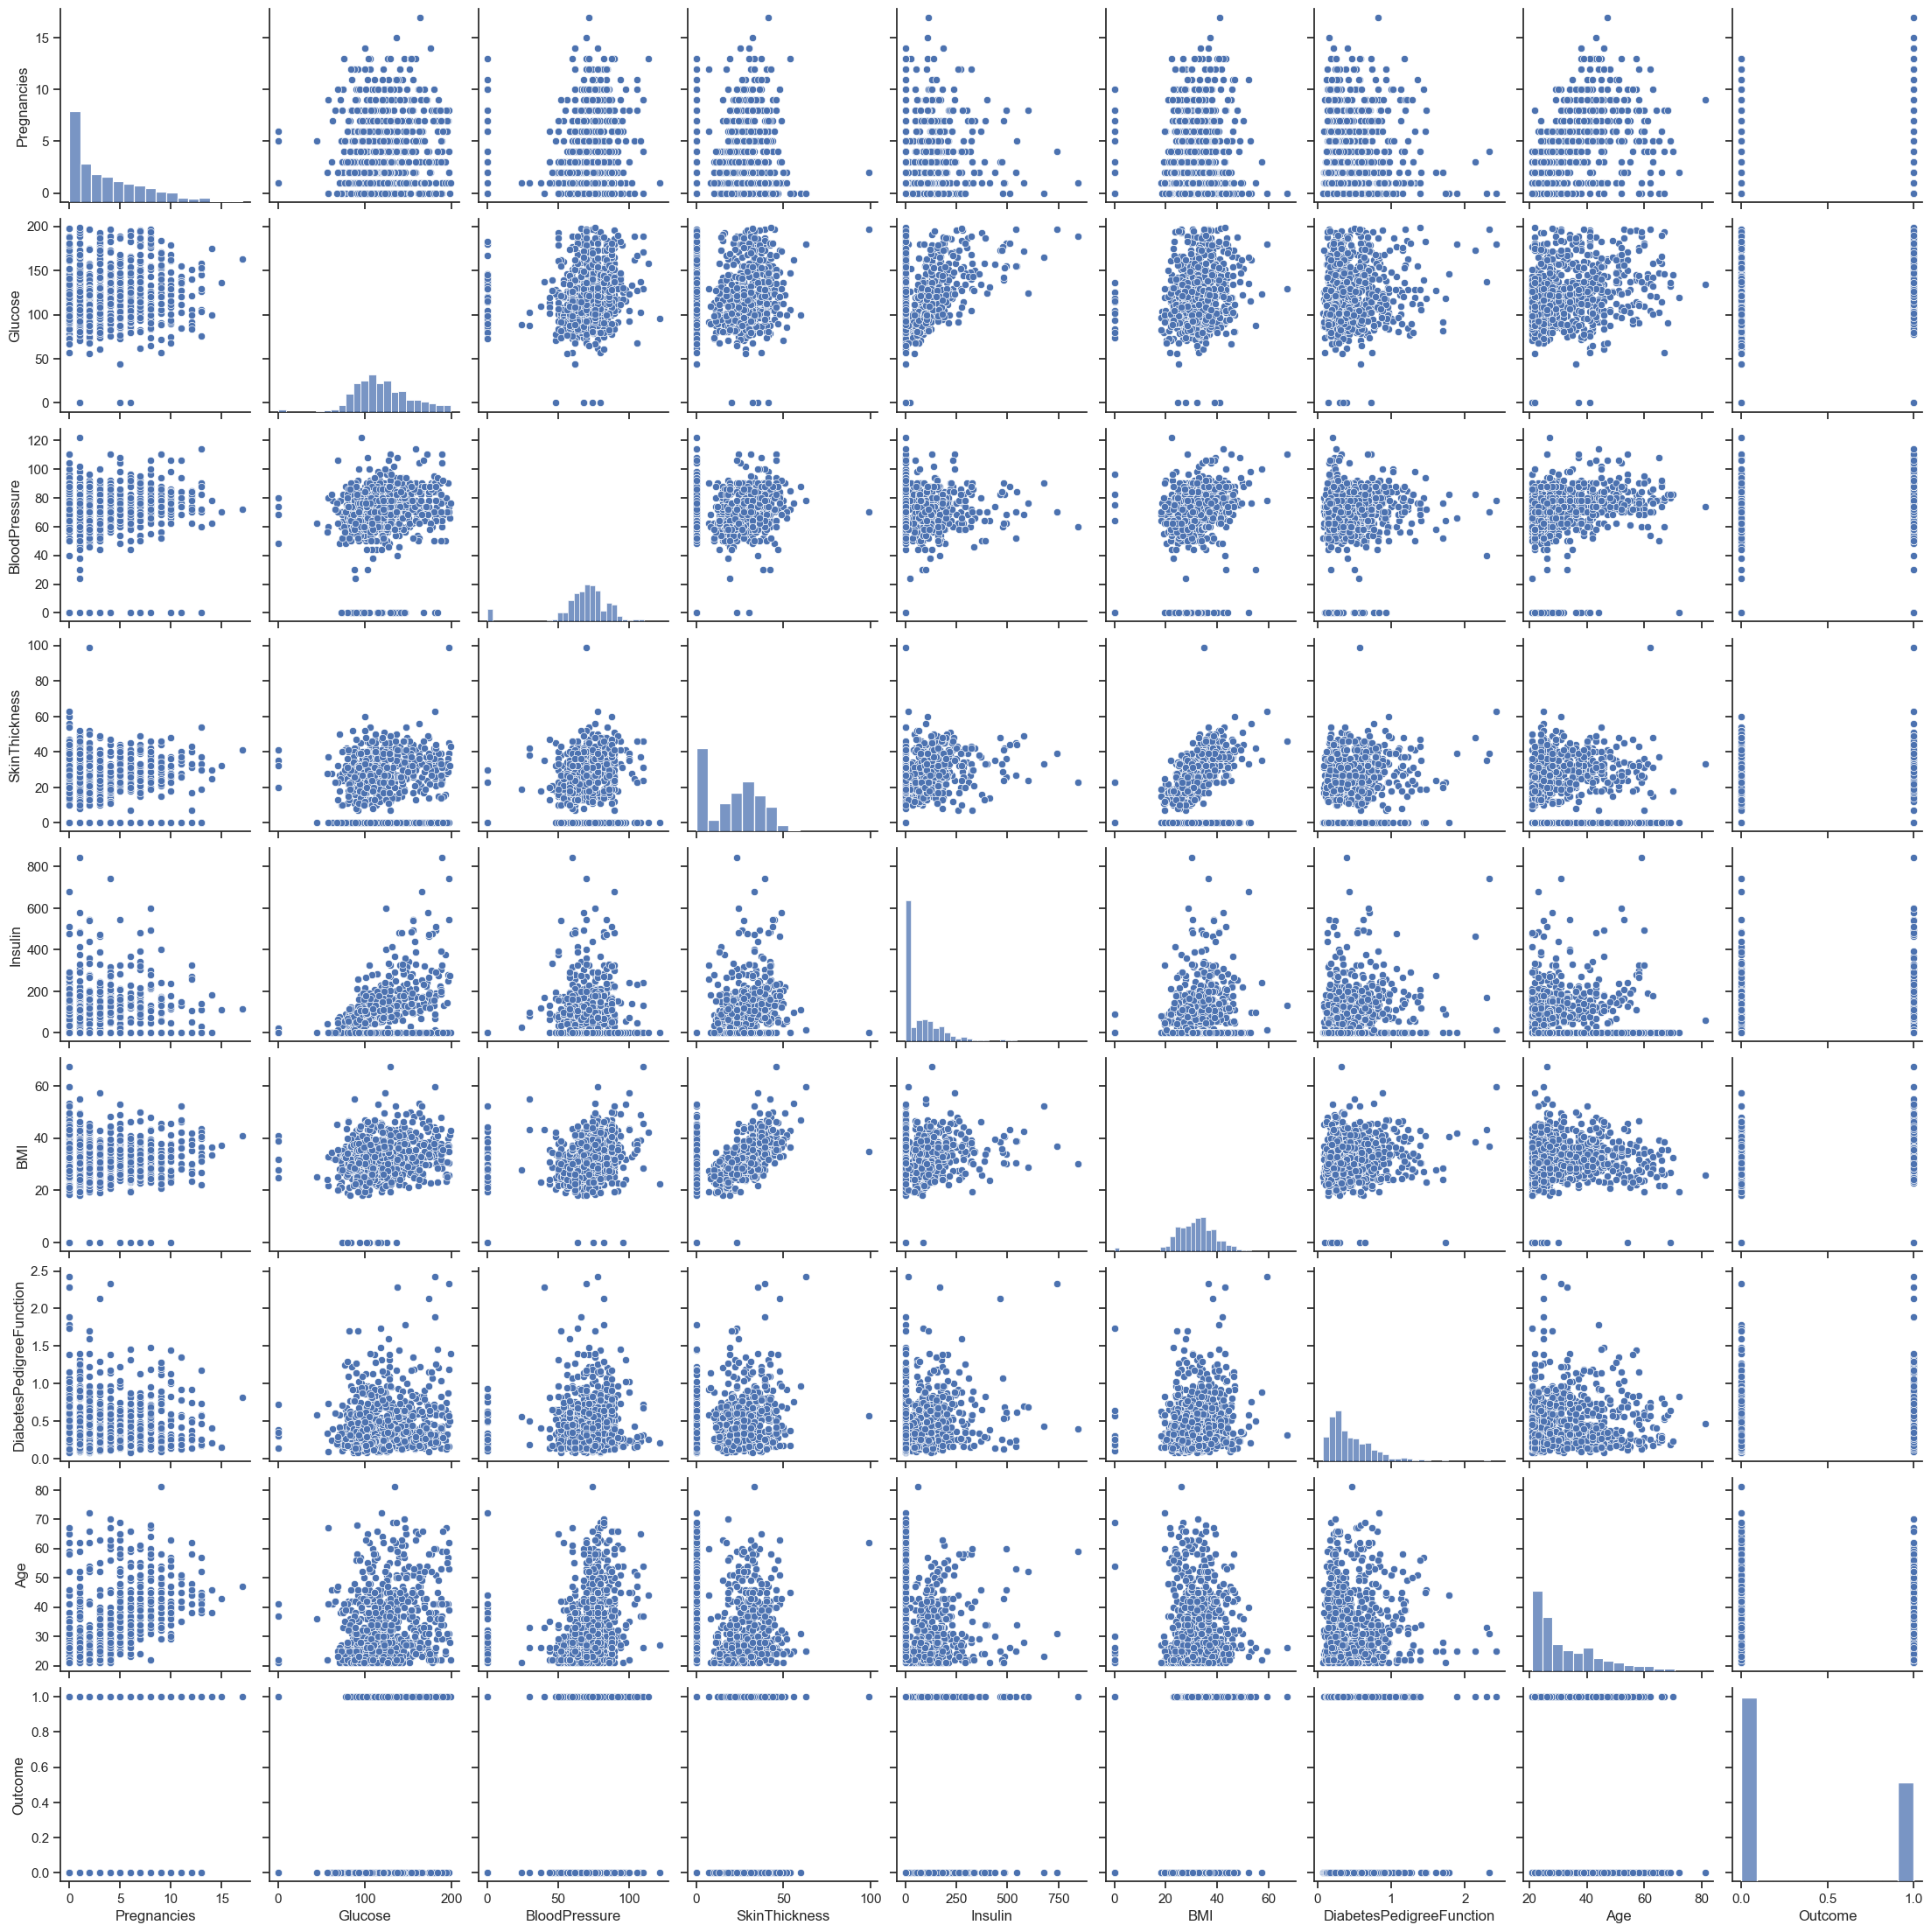

In [51]:
sns.pairplot(health_dataset)

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


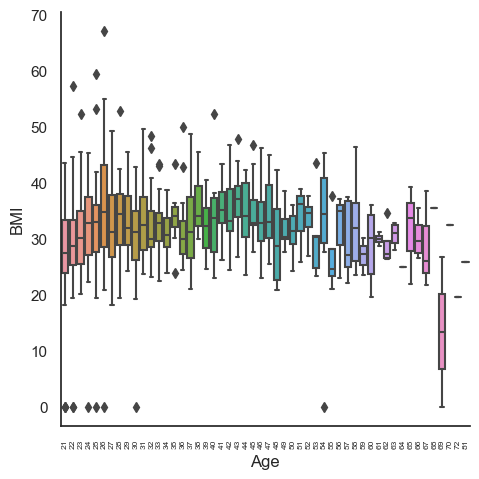

In [93]:
sns.set(rc = {'figure.figsize':(4,3)}, style='white')

sns.catplot(health_dataset, x="Age", y="BMI", kind='box')
plt.xticks(rotation=90, size=6)
plt.show()

# machine learning 

In [156]:
from sklearn.linear_model  import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, recall_score, precision_score, r2_score, roc_curve, roc_auc_score

In [104]:
data=health_dataset[health_dataset.columns[:-1]].values
target=health_dataset[health_dataset.columns[-1]].values

In [105]:
x_train , x_test, y_train, y_test=train_test_split(data, target, train_size=.7, random_state=1)

In [138]:
lg=LogisticRegression(max_iter=1000, random_state=True, solver='newton-cg')
lg_model=lg.fit(x_train , y_train)
lg_y_pred=lg_model.predict(x_test)
print(classification_report(lg_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       168
           1       0.58      0.78      0.66        63

    accuracy                           0.78       231
   macro avg       0.74      0.78      0.75       231
weighted avg       0.81      0.78      0.79       231



In [136]:
np.random.seed(0)
parameters={
    
    'solver':['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty':['l2'],
    'tol':[0.001, 0.01, 0.1, 0.5]
    
}

grid_model=GridSearchCV(estimator=lg,
                       param_grid=parameters)
grid_model.fit(x_train, y_train)
  

GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=True),
             param_grid={'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga'],
                         'tol': [0.001, 0.01, 0.1, 0.5]})

In [137]:
grid_y_pred=grid_model.predict(x_test)
print(precision_score(y_test, grid_y_pred))

0.7777777777777778


In [141]:
rc=RidgeClassifier()
rc_model=rc.fit(x_train , y_train)
rc_y_pred=rc_model.predict(x_test)
print (precision_score(rc_y_pred, y_test))
print (recall_score(rc_y_pred, y_test))

0.5647058823529412
0.7741935483870968


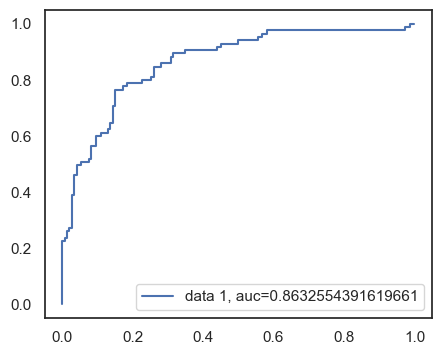

In [165]:
y_pred_proba =lg_model.predict_proba(x_test)[:,1]
sns.set(rc = {'figure.figsize':(5, 4)}, style='white')
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()